### **SHAPEAI - DATA SCIENTIST TRAINING & INTERNSHIP**

### **Author : Midhir Nambiar**

### **Task : Support Vector Classifier**

Outline:

1. Importing Dataset
2. Data Analysis
3. Feature Scaling
4. Train-Test Split
5. Model Building
6. Confusion matrix
7. Accuracy Score
8. Classification matrix

**Importing Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

**Data Analysis**

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19.0,19000.0,0.0
1,15810944.0,Male,35.0,20000.0,0.0
2,15668575.0,Female,26.0,43000.0,0.0
3,15603246.0,Female,27.0,57000.0,0.0
4,15804002.0,Male,19.0,76000.0,0.0


In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863.0,Female,46.0,41000.0,1.0
396,15706071.0,Male,51.0,23000.0,1.0
397,15654296.0,Female,50.0,20000.0,1.0
398,15755018.0,Male,36.0,33000.0,0.0
399,15594041.0,Female,49.0,36000.0,1.0


In [5]:
print(df.shape)

(400, 5)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          373 non-null    float64
 1   Gender           364 non-null    object 
 2   Age              370 non-null    float64
 3   EstimatedSalary  384 non-null    float64
 4   Purchased        389 non-null    float64
dtypes: float64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,3.730000e+02,370.000000,384.000000,389.000000
mean,1.569248e+07,37.935135,69158.854167,0.354756
std,7.122830e+04,10.510859,34155.202131,0.479055
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562974e+07,30.000000,43000.000000,0.000000
50%,1.569483e+07,37.000000,68500.000000,0.000000
75%,1.575045e+07,46.000000,87000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.isnull().sum()

User ID            27
Gender             36
Age                30
EstimatedSalary    16
Purchased          11
dtype: int64

In [9]:
# Dropping rows where each column is NULL
df = df.dropna(axis=0,how='all')
df.isnull().sum()

User ID            16
Gender             25
Age                19
EstimatedSalary     5
Purchased           0
dtype: int64

In [10]:
print(df.shape)

(389, 5)


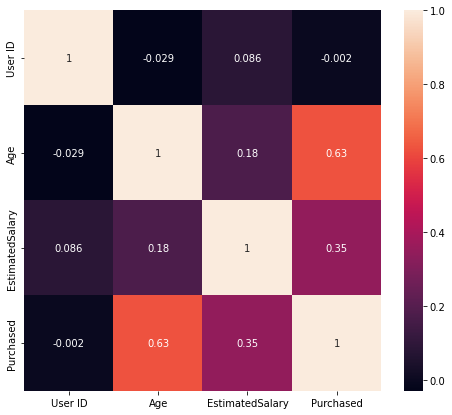

In [11]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
# Dropping User ID column as it has a small co-relation as well.
df.drop(columns='User ID',axis=1,inplace=True)

In [13]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0.0
1,Male,35.0,20000.0,0.0
2,Female,26.0,43000.0,0.0
3,Female,27.0,57000.0,0.0
4,Male,19.0,76000.0,0.0


In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
gender = pd.get_dummies(df.Gender , drop_first = True)
gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [16]:
df = pd.concat([gender,df],axis = 1)
df.head()

,Male,Gender,Age,EstimatedSalary,Purchased
0,1,Male,19.0,19000.0,0.0
1,1,Male,35.0,20000.0,0.0
2,0,Female,26.0,43000.0,0.0
3,0,Female,27.0,57000.0,0.0
4,1,Male,19.0,76000.0,0.0


In [17]:
df.drop(columns='Gender',axis=1,inplace=True)
df.head()

,Male,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0.0
1,1,35.0,20000.0,0.0
2,0,26.0,43000.0,0.0
3,0,27.0,57000.0,0.0
4,1,19.0,76000.0,0.0


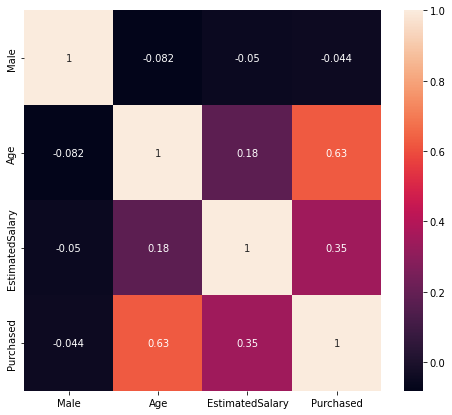

In [18]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [19]:
# Fill NA with 0
df['EstimatedSalary'] = df['EstimatedSalary'].fillna(0)

In [20]:
# Using forward filling
df['Age'] = df['Age'].fillna(method = 'ffill')

In [21]:
df.isnull().sum()

Male               0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [22]:
df.drop(columns='Male',axis=1,inplace=True)
df.head()

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0.0
1,35.0,20000.0,0.0
2,26.0,43000.0,0.0
3,27.0,57000.0,0.0
4,19.0,76000.0,0.0


In [23]:
x = df.iloc[:,:-1]
x

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [24]:
y = df.iloc[:,-1].values
y

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 1.

**Feature Scaling**

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
stanscale = StandardScaler()

In [27]:
x = stanscale.fit_transform(x)
x

array([[-1.8067242 , -1.41683721],
       [-0.2744921 , -1.38808057],
       [-1.13637266, -0.72667796],
       [-1.04060815, -0.32408506],
       [-1.8067242 ,  0.22229101],
       [-1.04060815, -0.29532843],
       [-1.04060815,  0.45234409],
       [-0.56178562,  2.35028203],
       [-0.56178562, -1.01424431],
       [-0.56178562, -0.09403198],
       [-0.56178562,  0.33731755],
       [-0.56178562, -0.46786824],
       [-0.56178562,  0.50985736],
       [-0.56178562, -1.44559384],
       [-0.56178562,  0.39483082],
       [-0.84907914,  0.33731755],
       [ 0.87468199, -1.24429739],
       [ 0.68315297, -1.21554076],
       [ 0.77891748, -1.15802749],
       [ 0.97044649, -1.12927085],
       [ 0.68315297, -1.3305673 ],
       [ 0.87468199, -0.55413815],
       [ 0.97044649, -0.78419123],
       [ 0.68315297, -1.3305673 ],
       [ 0.77891748, -1.30181067],
       [ 0.87468199, -1.38808057],
       [ 1.066211  , -1.15802749],
       [ 0.87468199, -1.10051422],
       [-0.84907914,

**Train-Test Split**

In [28]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 10)

In [29]:
print(x_train.shape)

(272, 2)


**Model Building**

In [30]:
model = SVC(kernel = 'linear')

In [31]:
model.fit(x_train , y_train)

SVC(kernel='linear')

In [32]:
y_pred = model.predict(x_test)
y_pred

array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

**Confusion Matrix**

In [33]:
#Evaluation metrics - Confusion matrix , Precision , Recall , F1score
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
cm

array([[73, 12],
       [ 8, 24]])

**Accuracy Score**

In [34]:
accuracy_score(y_test , y_pred)

0.8290598290598291

**Classification Matrix**

In [36]:
# Classification matrix
from sklearn.metrics import classification_report
cr = classification_report(y_test , y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88        85
         1.0       0.67      0.75      0.71        32

    accuracy                           0.83       117
   macro avg       0.78      0.80      0.79       117
weighted avg       0.84      0.83      0.83       117

